In [ ]:
!pip install roboflow
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 82.2 MB/s eta 0:00:00
 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow

In [ ]:
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("computer-vision-raspberry-pi").project("clean-vs-messy-room")
version = project.version(1)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Clean-Vs-Messy-Room-1 in folder:: 100%|██████████| 251/251 [00:00<00:00, 6713.07it/s]


# 🖼️ Visualizing Dataset Samples

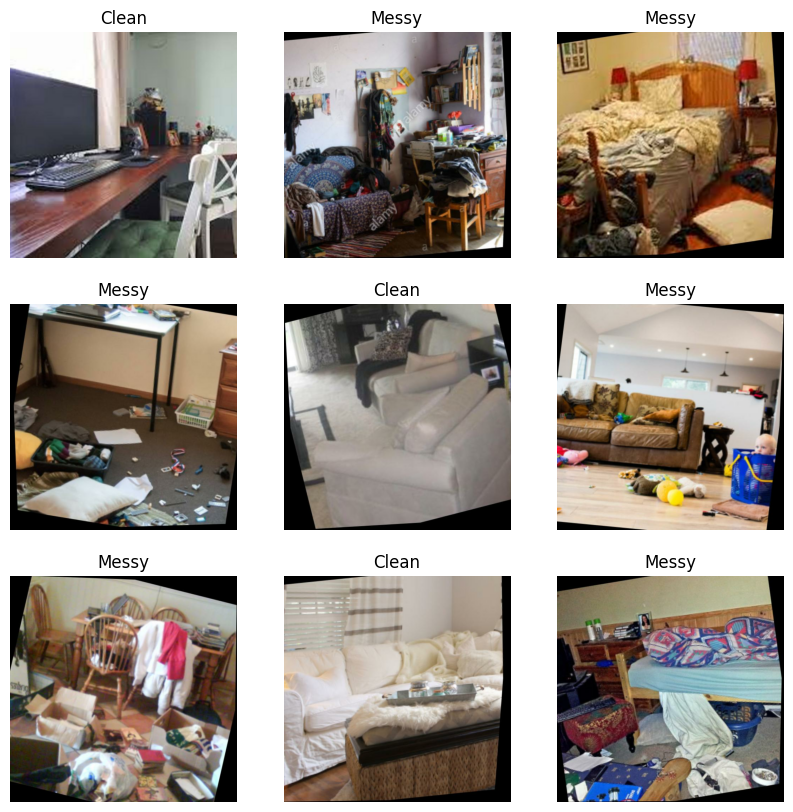

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# 🔄 Data Preprocessing

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset.location + "/train",
    image_size=(640, 640),
    batch_size=32
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset.location + "/valid",
    image_size=(640, 640),
    batch_size=32
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset.location + "/test",
    image_size=(640, 640),
    batch_size=32
)

Found 210 files belonging to 2 classes.
Found 20 files belonging to 2 classes.
Found 10 files belonging to 2 classes.


# 🤖 Custom CNN Model Training Result

I've trained a custom CNN model before, but the results were not significantly better on the validation set.  
Despite achieving high training accuracy, the **validation loss remained relatively high**, suggesting overfitting and weak generalization.

🔗 [Colab Notebook – Custom CNN Training](https://colab.research.google.com/drive/1nq43dypTu2cI9DaErRIIfpocG-I7YU9p?usp=sharing)


Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.


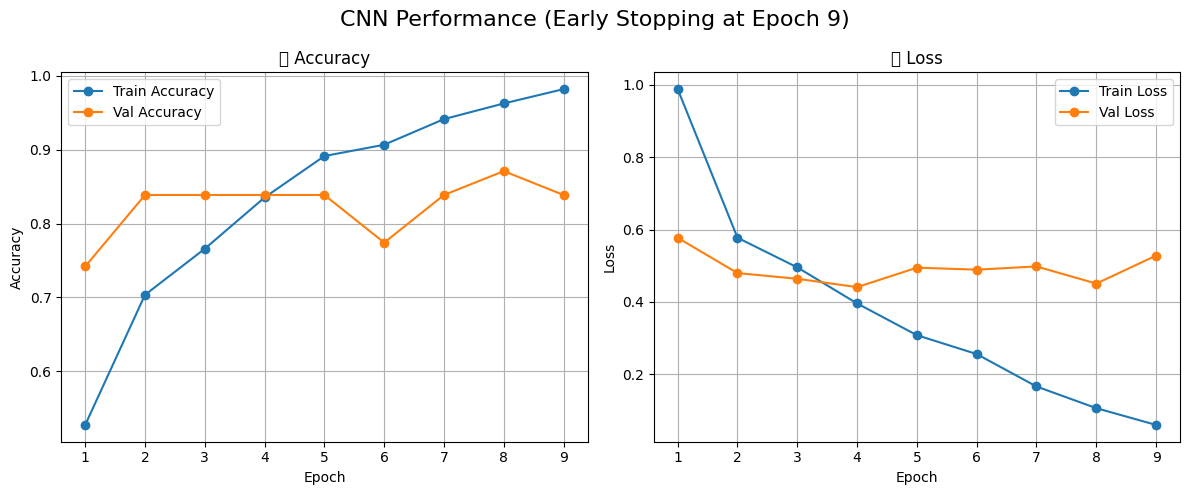

In [ ]:
epochs = list(range(1, 10))
train_acc = [0.5274, 0.7035, 0.7659, 0.8353, 0.8914, 0.9067, 0.9414, 0.9626, 0.9820]
val_acc =   [0.7419, 0.8387, 0.8387, 0.8387, 0.8387, 0.7742, 0.8387, 0.8710, 0.8387]
train_loss = [0.9885, 0.5775, 0.4955, 0.3958, 0.3080, 0.2558, 0.1661, 0.1062, 0.0598]
val_loss =   [0.5773, 0.4797, 0.4640, 0.4409, 0.4947, 0.4892, 0.4981, 0.4507, 0.5281]

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Val Accuracy', marker='o')
plt.title('📈 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Val Loss', marker='o')
plt.title('📉 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.suptitle('CNN Performance (Early Stopping at Epoch 9)', fontsize=16)
plt.tight_layout()
plt.show()

# 🧠 Build the Model

So, we switched to Transfer Learning with ResNet50
To address the above issues and accelerate learning, we adopt Transfer Learning with a pre-trained ResNet50 model.
This approach helps extract robust features from images using weights trained on the large ImageNet dataset.
<br>
### ✅ Benefits:
Leverages powerful image features

*   Leverages powerful image features
*   Reduces training time
*   Helps mitigate overfitting on small datasets

In [ ]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(640, 640, 3))
base_model.trainable = False  # Freeze ResNet50

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(2, activation='softmax')  # 2 classes: Clean, Messy
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 234s 33s/step - accuracy: 0.5723 - loss: 0.7294 - val_accuracy: 0.7500 - val_loss: 0.4916
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 227s 32s/step - accuracy: 0.8130 - loss: 0.3934 - val_accuracy: 0.8500 - val_loss: 0.2838
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 227s 32s/step - accuracy: 0.9650 - loss: 0.2238 - val_accuracy: 0.9000 - val_loss: 0.2967
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 227s 32s/step - accuracy: 0.9607 - loss: 0.1740 - val_accuracy: 0.9000 - val_loss: 0.2827
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 226s 32s/step - accuracy: 0.9695 - loss: 0.1405 - val_accuracy: 0.8500 - val_loss: 0.2170


In [ ]:
model.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 1.0000 - loss: 0.1453


[0.14525453746318817, 1.0]

# 📊 Visualize Training Metrics

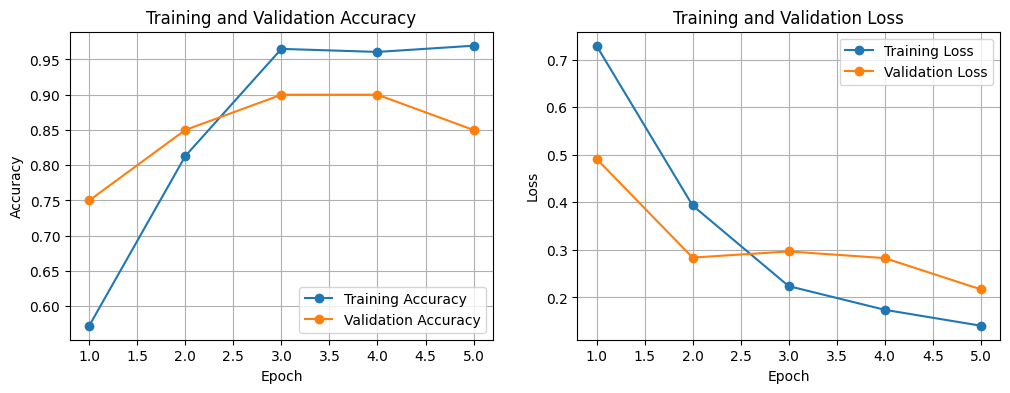

In [ ]:
acc = [0.5723, 0.8130, 0.9650, 0.9607, 0.9695]
val_acc = [0.7500, 0.8500, 0.9000, 0.9000, 0.8500]
loss = [0.7294, 0.3934, 0.2238, 0.1740, 0.1405]
val_loss = [0.4916, 0.2838, 0.2967, 0.2827, 0.2170]

epochs_range = range(1, 6)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


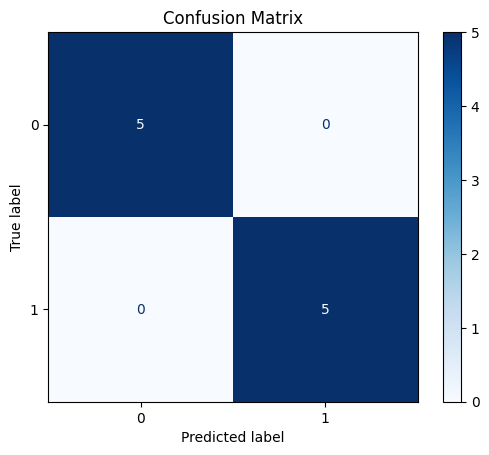

In [ ]:
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)
    y_pred.extend(preds)
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# 🔮 Prediction Demo

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


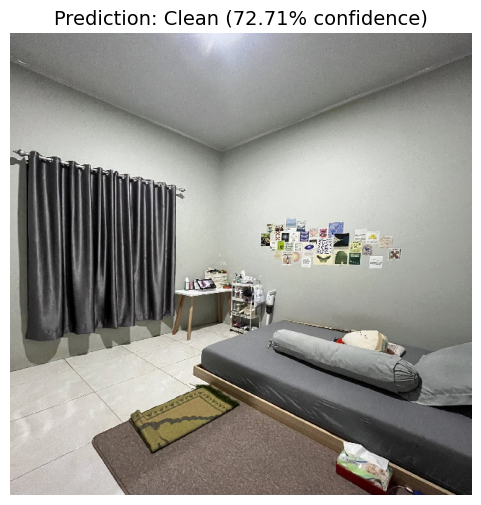

In [ ]:
img_path = '/content/my-bedroom.jpeg'

img = image.load_img(img_path, target_size=(640, 640))
img_array = image.img_to_array(img)
img_array_expanded = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array_expanded)
score = tf.nn.softmax(predictions[0])
predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class} ({confidence:.2f}% confidence)", fontsize=14)
plt.show()

# 📥 Save Model

In [ ]:
model.save('resnet_clean_messy.h5')